In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import train dataset

data_type = {
            'listing_id': int,
            'name': str,
             'street': str,
             'type': str,
             'model': str,
             'market_segment': str,
             'type_of_area': str,
             'bedrooms': str,
             'bathrooms': float,
             'district': int,
             'region': str,
             'planning_area': str,
             'subszone': str,
             'lat': float,
             'lng': float,
             'tenure': str,
             'built_year': float,
             'no_of_units': float,
             'area_size': float,
             'eco_category': str,
             'accessibility': str,
             'date_listed': str,
             'price': int}

train_set = pd.read_csv("Data/train.csv", dtype=data_type)


# Make a copy
train_df = train_set.copy().drop(['listing_id', 'market_segment', 'type_of_area', 'eco_category', 'accessibility', 'date_listed'], axis=1)
train_df.loc[train_df[train_df.model=='others'].index, 'model'] = train_df.loc[train_df[train_df.model=='others'].index, 'type']
train_df.head(3)

,name,street,type,model,bedrooms,bathrooms,district,region,planning_area,subszone,lat,lng,tenure,built_year,no_of_units,area_size,price
0,seascape,57 cove way,condominium,condominium,3,4.0,4,central region,southern islands,sentosa,1.239337,103.837487,leasehold/99 years,2011.0,151.0,2336.0,5390000
1,la maison,10 moulmein rise,apartment,apartment,3,3.0,11,central region,novena,moulmein,1.319533,103.847030,freehold,1999.0,24.0,1259.0,2310000
2,viva,2 suffolk walk,condominium,condominium,4,3.0,11,central region,novena,moulmein,1.315656,103.844445,freehold,2012.0,235.0,1959.0,5279500


In [3]:
# Import test dataset

test_set = pd.read_csv("Data/test.csv", dtype=data_type)

# Make a copy
test_df = test_set.copy().drop(['listing_id', 'market_segment', 'type_of_area', 'eco_category', 'accessibility', 'date_listed'], axis=1)
test_df.loc[test_df[test_df.model=='others'].index, 'model'] = test_df.loc[test_df[test_df.model=='others'].index, 'type']
test_df.head(3)

,name,street,type,model,bedrooms,bathrooms,district,region,planning_area,subszone,lat,lng,tenure,built_year,no_of_units,area_size
0,leedon green,leedon heights,condominium,condominium,2,2.0,10,central region,bukit timah,farrer court,1.313566,103.803218,freehold,NaN,638.0,710.0
1,the line @ tanjong rhu,tanjong rhu road,condominium,condominium,3,2.0,15,central region,kallang,tanjong rhu,1.298437,103.884408,freehold,2016.0,130.0,1055.0
2,parc elegance,telok kurau road,apartment,apartment,NaN,1.0,15,east region,bedok,frankel,1.317851,103.908905,freehold,2013.0,157.0,463.0


In [4]:
# Check nan for each column
for col_name, _ in train_df.iteritems():
    if len(train_df[train_df[col_name].isna()])>0:
        print("%s: %s rows" % (col_name, len(train_df[train_df[col_name].isna()])))

model: 1280 rows
bedrooms: 404 rows
bathrooms: 1236 rows
tenure: 287 rows
built_year: 10043 rows
no_of_units: 1042 rows
area_size: 2 rows


In [5]:
# Check nan for each column
for col_name, _ in test_df.iteritems():
    if len(test_df[test_df[col_name].isna()])>0:
        print("%s: %s rows" % (col_name, len(test_df[test_df[col_name].isna()])))

model: 388 rows
bedrooms: 118 rows
bathrooms: 337 rows
tenure: 85 rows
built_year: 2875 rows
no_of_units: 326 rows


In [6]:
# Check unique for each column
for col_name, _ in train_df.iteritems():
    if data_type[col_name]==str:
        print("%s: %d values" % (col_name, len(train_df[col_name].unique())))

name: 1650 values
street: 3442 values
type: 2 values
model: 15 values
bedrooms: 18 values
region: 5 values
planning_area: 38 values
subszone: 193 values
tenure: 54 values


In [7]:
# Check unique for each column
for col_name, _ in train_df.iteritems():
    if data_type[col_name]==str:
        print("%s: %s" % (col_name, str(train_df[col_name].unique())))

name: ['seascape' 'la maison' 'viva' ... 'kembangan plaza' 'the grandhill'
 'beauty world centre']
street: ['57 cove way ' '10 moulmein rise ' '2 suffolk walk ' ... '71 oxley rise '
 '301 jalan bukit ho swee ' '12b cairnhill rise ']
type: ['condominium' 'apartment']
model: ['condominium' 'apartment' 'executive condominium' nan 'walk-up apt'
 'townhouse' 'soho' 'penthouse' 'duplex' 'high rise'
 'residential with commercial on level 1' 'with pool' 'low rise'
 'shophouse' 'strata terrace']
bedrooms: ['3' '4' '2' '1' '3+1' '1+1' '2+1' nan '5' '4+1' '7' '5+1' '6' '3+2' '2+2'
 '9' '8' '4+2']
region: ['central region' 'east region' 'north region' 'west region'
 'north-east region']
planning_area: ['southern islands' 'novena' 'bedok' 'sembawang' 'bukit batok' 'sengkang'
 'downtown core' 'newton' 'tampines' 'kallang' 'bukit merah'
 'choa chu kang' 'bukit timah' 'outram' 'queenstown' 'river valley'
 'singapore river' 'toa payoh' 'hougang' 'tanglin' 'pasir ris' 'geylang'
 'museum' 'clementi' 'ser

In [8]:
#transformaing bedrooms, i.e: from 2+1 to 3
train_df['bedrooms']=train_df['bedrooms'].apply(lambda x: x if type(x)==float else eval(x))
#transforming years
train_df['built_year']=2022.-train_df['built_year']

In [9]:
train_df.groupby('model')['bedrooms'].describe()

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
apartment,13043.0,2.509775,1.156630,1.0,2.00,2.0,3.00,8.0
condominium,10672.0,2.731166,1.096579,1.0,2.00,3.0,3.00,9.0
duplex,2.0,3.000000,0.000000,3.0,3.00,3.0,3.00,3.0
executive condominium,595.0,3.289076,0.767916,1.0,3.00,3.0,4.00,6.0
high rise,3.0,3.333333,0.577350,3.0,3.00,3.0,3.50,4.0
low rise,3.0,2.666667,0.577350,2.0,2.50,3.0,3.00,3.0
penthouse,2.0,3.500000,0.707107,3.0,3.25,3.5,3.75,4.0
residential with commercial on level 1,1.0,3.000000,NaN,3.0,3.00,3.0,3.00,3.0
shophouse,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
train_df.groupby('model')['no_of_units'].describe()

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
apartment,12855.0,443.679035,469.614766,1.0,84.00,258.0,660.00,1862.0
condominium,10245.0,482.409370,367.262464,12.0,219.00,428.0,638.00,2203.0
duplex,2.0,219.000000,0.000000,219.0,219.00,219.0,219.00,219.0
executive condominium,584.0,556.279110,189.320358,248.0,427.00,512.0,602.00,1327.0
high rise,3.0,654.666667,1045.581338,51.0,51.00,51.0,956.50,1862.0
low rise,3.0,381.666667,288.097784,49.0,298.50,548.0,548.00,548.0
penthouse,4.0,477.750000,498.457872,56.0,59.00,407.5,826.25,1040.0
residential with commercial on level 1,1.0,8.000000,NaN,8.0,8.00,8.0,8.00,8.0
shophouse,1.0,25.000000,NaN,25.0,25.00,25.0,25.00,25.0


In [11]:
train_df.groupby('model')['area_size'].describe()

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
apartment,13306.0,1148.463400,1041.518364,323.0,646.00,883.0,1281.00,13980.0
condominium,10783.0,1365.253269,1100.861360,226.0,721.00,1055.0,1539.00,13293.0
duplex,2.0,1324.000000,0.000000,1324.0,1324.00,1324.0,1324.00,1324.0
executive condominium,599.0,1164.899833,307.377270,495.0,985.00,1109.0,1281.00,2583.0
high rise,3.0,940.000000,33.060551,904.0,925.50,947.0,958.00,969.0
low rise,3.0,832.333333,108.969415,764.0,769.50,775.0,866.50,958.0
penthouse,4.0,3522.500000,1333.219787,1862.0,2887.25,3595.0,4230.25,5038.0
residential with commercial on level 1,1.0,4466.000000,NaN,4466.0,4466.00,4466.0,4466.00,4466.0
shophouse,1.0,4500.000000,NaN,4500.0,4500.00,4500.0,4500.00,4500.0


In [12]:
train_df.groupby('model')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
apartment,13306.0,2.941825e+06,4.284127e+06,588500.0,1375000.0,1863700.0,2838000.0,66000000.0
condominium,10784.0,3.164081e+06,4.595296e+06,556600.0,1320000.0,1870000.0,3289000.0,74800000.0
duplex,2.0,4.234550e+06,5.313907e+05,3858800.0,4046675.0,4234550.0,4422425.0,4610300.0
executive condominium,599.0,1.401398e+06,3.422226e+05,624800.0,1155000.0,1342000.0,1615900.0,2860000.0
high rise,3.0,2.359133e+06,3.767742e+05,1927200.0,2228600.0,2530000.0,2575100.0,2620200.0
low rise,3.0,1.707067e+06,3.271288e+05,1344900.0,1570050.0,1795200.0,1888150.0,1981100.0
penthouse,4.0,8.389150e+06,7.001208e+06,4056800.0,4561700.0,5337200.0,9164650.0,18825400.0
residential with commercial on level 1,1.0,9.460000e+06,NaN,9460000.0,9460000.0,9460000.0,9460000.0,9460000.0
shophouse,1.0,1.188000e+07,NaN,11880000.0,11880000.0,11880000.0,11880000.0,11880000.0


In [13]:
# Take a glance on dataset
train_df.head(5)

,name,street,type,model,bedrooms,bathrooms,district,region,planning_area,subszone,lat,lng,tenure,built_year,no_of_units,area_size,price
0,seascape,57 cove way,condominium,condominium,3.0,4.0,4,central region,southern islands,sentosa,1.239337,103.837487,leasehold/99 years,11.0,151.0,2336.0,5390000
1,la maison,10 moulmein rise,apartment,apartment,3.0,3.0,11,central region,novena,moulmein,1.319533,103.847030,freehold,23.0,24.0,1259.0,2310000
2,viva,2 suffolk walk,condominium,condominium,4.0,3.0,11,central region,novena,moulmein,1.315656,103.844445,freehold,10.0,235.0,1959.0,5279500
3,urban treasures,205 jalan eunos,condominium,condominium,3.0,2.0,14,east region,bedok,kaki bukit,1.329367,103.905791,freehold,NaN,237.0,883.0,1843600
4,infini at east coast,east coast road,apartment,apartment,3.0,3.0,15,east region,bedok,frankel,1.309176,103.911352,freehold,NaN,36.0,1066.0,2262700


In [14]:
# delete special type that does not exist in test
for col in train_df.model.unique():
    if col not in test_df.model.unique():
        train_df.drop(train_df[train_df.model==col].index, axis=0, inplace=True)

In [15]:
# Find correlation between bathroom and bedroom
tmpdf = train_df[['bathrooms', 'bedrooms']].dropna().astype(float)
print("Number of samples that both bedroom and bathroom are unknown: ", (train_df['bathrooms'].isnull() & train_df['bedrooms'].isnull()).sum())
print("correlation between bathroom and bedroom: ", tmpdf.bathrooms.corr(tmpdf.bedrooms))

Number of samples that both bedroom and bathroom are unknown:  72
correlation between bathroom and bedroom:  0.8066452687933631


In [16]:
# Deal with NaN data

# Get median for three columns: bathrooms, built_year, no_of_units
bedroom_median = np.median(train_df['bedrooms'].dropna())
bedroom_mean = np.mean(train_df['bedrooms'].dropna())
bathroom_median = np.median(train_df['bathrooms'].dropna())
bathroom_mean = np.mean(train_df['bathrooms'].dropna())
built_year_median = np.median(train_df['built_year'].dropna())
built_year_mean = np.mean(train_df['built_year'].dropna())
no_of_units_median = np.median(train_df['no_of_units'].dropna())

print("bedroom_median: ", bedroom_median)
print("bathroom_median: ", bathroom_median)
print("built_year_median: ", built_year_median)
print("no_of_units_median: ", no_of_units_median)

train_df['model'].fillna(value=train_df['type'], inplace=True)

# Because bedroom and bathroom are related, first fill them with each other
train_df['bedrooms'].fillna(value=train_df['bathrooms'], inplace=True)
train_df['bathrooms'].fillna(value=train_df['bedrooms'], inplace=True)

# If both unkonwn, try fill with median group by "model"
train_df["bedrooms"] = train_df.groupby("model")["bedrooms"].transform(lambda x: x.fillna(x.median()))
train_df["bathrooms"] = train_df.groupby("model")["bathrooms"].transform(lambda x: x.fillna(x.median()))

# Fill with the whole train set mean with the remaining blanks
train_df["bedrooms"].fillna(value=bedroom_mean, inplace=True)
train_df["bathrooms"].fillna(value=bathroom_mean, inplace=True)

train_df['built_year'].fillna(value=built_year_mean, inplace=True)
train_df["no_of_units"] = train_df.groupby("model")["no_of_units"].transform(lambda x: x.fillna(x.median()))

# For no_of_units, divide all houses into 10 categories, manually set lowest limit=0 and highest limit=10000
cut_bins = np.zeros(shape=(11,))
cut_bins = np.quantile(train_df['no_of_units'], [0.1*i for i in range(11)])
cut_labels = [(cut_bins[i] + cut_bins[i+1])/2 for i in range(10)]
cut_bins[0], cut_bins[-1] = 0, 10000000
train_df['no_of_units'] = pd.cut(train_df['no_of_units'], bins=cut_bins, labels=cut_labels, include_lowest=True).values

# Check column 'tenure', treat houses that are not 'freehold' as 'leasehold', also fill NaN with 'leasehold'
train_df['tenure'].where(train_df['tenure']=='freehold', other='leasehold', inplace=True)

# Drop rows whose area_size is NaN
train_df.dropna(axis=0, subset=['area_size'], inplace=True)

# Make a copy as this location, saving for alter test set processing
train_df_copy = train_df.copy()

bedroom_median:  3.0
bathroom_median:  2.0
built_year_median:  8.0
no_of_units_median:  366.0


In [17]:
# Convert some string columns to 0-1 verctors

# Type
type_mapping = {'apartment': 0 ,'condominium' : 1}
train_df['type'] = train_df['type'].map(type_mapping)

# Tenure
tenure_mapping = {'freehold':0 ,'leasehold': 1}
train_df['tenure'] = train_df['tenure'].map(tenure_mapping)


# Convert some string columns to numerical values
# Model
model_mapping = {'executive condominium': 0,
                'high rise': 1,
                'townhouse': 2,
                'walk-up apt': 3,
                'penthouse': 4,
                'condominium': 5,
                'apartment': 6,
                'duplex': 7}
train_df['model'] = train_df['model'].map(model_mapping)

# Name
name_mapping = {label:idx for idx,label in enumerate(set(train_df['name']))}
train_df['name'] = train_df['name'].map(name_mapping)

# Street
street_mapping = {label:idx for idx,label in enumerate(set(train_df['street']))}
train_df['street'] = train_df['street'].map(street_mapping)

# Region
region_mapping = {'north-east region': 0,
                 'north region': 1,
                 'west region': 2,
                 'east region': 3,
                 'central region': 4}
train_df['region'] = train_df['region'].map(region_mapping)

# Planning area
planning_area_mapping = {label:idx for idx,label in enumerate(set(train_df['planning_area']))}
train_df['planning_area'] = train_df['planning_area'].map(planning_area_mapping)


In [18]:
# Convert some columns to category type
discrete_cols = ['name', 'street', 'type', 'model', 'district',
       'region', 'planning_area', 'subszone', 'tenure']
for col in discrete_cols:
    train_df[col] = train_df[col].astype("category")

<AxesSubplot:>

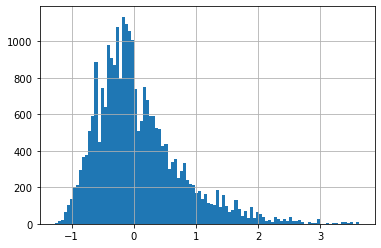

In [19]:
# Convert price to log lavel for better predictions
original_price = train_df['price'].values
train_df.price = train_df.price.apply(lambda x:np.log1p(x)-14.5)
train_df.price.hist(bins=100)

In [20]:
# Show train set after data preprocessing
train_df.reset_index(drop=True, inplace=True)
train_df.head(5)

,name,street,type,model,bedrooms,bathrooms,district,region,planning_area,subszone,lat,lng,tenure,built_year,no_of_units,area_size,price
0,1375,1884,1,5,3.0,4.0,4,4,15,sentosa,1.239337,103.837487,1,11.000000,138.5,2336.0,1.000056
1,1440,450,0,6,3.0,3.0,11,4,1,moulmein,1.319533,103.847030,0,23.000000,28.5,1259.0,0.152759
2,1109,819,1,5,4.0,3.0,11,4,1,moulmein,1.315656,103.844445,0,10.000000,213.0,1959.0,0.979342
3,523,3274,1,5,3.0,2.0,14,3,2,kaki bukit,1.329367,103.905791,0,11.073072,213.0,883.0,-0.072769
4,345,117,0,6,3.0,3.0,15,3,2,frankel,1.309176,103.911352,0,11.073072,28.5,1066.0,0.132070


In [21]:
# Check correlation between 'price' and other columns
print(train_df.corr(method='pearson')['price'])

bedrooms      0.662045
bathrooms     0.745969
lat          -0.411701
lng          -0.126782
built_year    0.037426
area_size     0.817330
price         1.000000
Name: price, dtype: float64


Column name: district


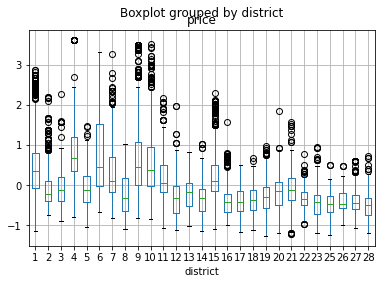

Column name: region


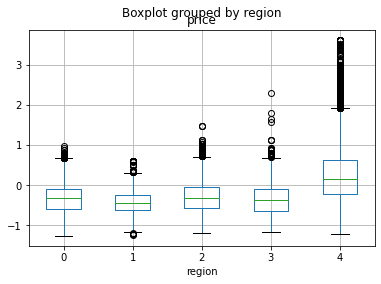

In [22]:
for col_name in ['district', 'region']:
    print("Column name: %s" % (col_name))
    
    # Box plot
    train_df.boxplot(column='price', by=col_name)
    plt.show()

In [23]:
# Import auxiliary data
commercial_centres = pd.read_csv("data/auxiliary-data/sg-commerical-centres.csv")
hawker_centres = pd.read_csv("data/auxiliary-data/sg-gov-markets-hawker-centres.csv")
primary_schools = pd.read_csv("data/auxiliary-data/sg-primary-schools.csv")
secondary_schools = pd.read_csv("data/auxiliary-data/sg-secondary-schools.csv")
shopping_malls = pd.read_csv("data/auxiliary-data/sg-shopping-malls.csv")
stations = pd.read_csv("data/auxiliary-data/sg-train-stations.csv")


In [24]:
# Calculate distance in km with lat & lng
def haversine_batch(train_lng, train_lat, place_lng, place_lat):  # lng1，lat1，lng2，lat2
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """

    place_lat = np.radians(place_lat)
    place_lng = np.radians(place_lng)

    train_lat = np.radians(train_lat)
    train_lng = np.radians(train_lng)

    dlat = place_lat - train_lat
    dlng = place_lng - train_lng

    a = np.sin(dlat / 2) ** 2 + np.cos(train_lat) * np.cos(place_lat) * np.sin(dlng / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371 # Radius of the earth in km
    return c * r


def cal_distance(X, is_train: bool):
    # Find distance to nearest facilities for each house
    facilities = [commercial_centres, hawker_centres, primary_schools, secondary_schools, shopping_malls, stations]

    res = []

    for f in facilities:

        distance = np.full((len(X), 1), np.inf)

        for _, row in f.iterrows():
            d = haversine_batch(X['lng'].values, X['lat'].values, row['lng'], row['lat']).reshape(-1, 1)
            distance = np.minimum(distance, d)
        
        res.append(distance)
        
    if is_train:
        res.append(X['price'].values.reshape(-1, 1))
        pd_distance = pd.DataFrame(data=np.squeeze(np.asarray(res)).swapaxes(0, 1),
                              columns=['to_commercial_centres', 'to_hawker_centres', 'to_primary_schools',
                                       'to_secondary_schools', 'to_shopping_malls', 'to_train_stations', 'price'])
    else:
        pd_distance = pd.DataFrame(data=np.squeeze(np.asarray(res)).swapaxes(0, 1),
                          columns=['to_commercial_centres', 'to_hawker_centres', 'to_primary_schools',
                                   'to_secondary_schools', 'to_shopping_malls', 'to_train_stations'])
    return pd_distance

In [25]:
# Find distance
train_distance = cal_distance(train_df, is_train=True)
# Discover correlations between price to each other parameter
print(train_distance.corr(method='pearson')['price'])

to_commercial_centres    0.017520
to_hawker_centres       -0.025920
to_primary_schools       0.283325
to_secondary_schools     0.312877
to_shopping_malls       -0.052205
to_train_stations        0.060003
price                    1.000000
Name: price, dtype: float64


In [26]:
# Show pd_distance
train_distance.reset_index(drop=True, inplace=True)
train_distance.head(3)

,to_commercial_centres,to_hawker_centres,to_primary_schools,to_secondary_schools,to_shopping_malls,to_train_stations,price
0,5.604095,4.079855,4.064895,4.429845,3.218556,3.409821,1.000056
1,0.407610,0.519457,0.235428,1.263926,0.339015,0.370228,0.152759
2,0.498692,0.648320,0.294793,1.075413,0.201332,0.536424,0.979342


In [27]:
# Option 1: train dataset without "distance" information
X_train_without_auxiliary_data = train_df[['type', 'model', 'bedrooms', 'bathrooms', 'district', 'tenure', 'built_year', 'no_of_units', 'area_size']]
X_train_without_auxiliary_data.head(3)

,type,model,bedrooms,bathrooms,district,tenure,built_year,no_of_units,area_size
0,1,5,3.0,4.0,4,1,11.0,138.5,2336.0
1,0,6,3.0,3.0,11,0,23.0,28.5,1259.0
2,1,5,4.0,3.0,11,0,10.0,213.0,1959.0


In [28]:
# Option 2: train dataset with "distance" information
X_train_plus_auxiliary_data = pd.concat([X_train_without_auxiliary_data, train_distance.iloc[:, :-1]], axis=1)
X_train_plus_auxiliary_data.head(5)

,type,model,bedrooms,bathrooms,district,tenure,built_year,no_of_units,area_size,to_commercial_centres,to_hawker_centres,to_primary_schools,to_secondary_schools,to_shopping_malls,to_train_stations
0,1,5,3.0,4.0,4,1,11.000000,138.5,2336.0,5.604095,4.079855,4.064895,4.429845,3.218556,3.409821
1,0,6,3.0,3.0,11,0,23.000000,28.5,1259.0,0.407610,0.519457,0.235428,1.263926,0.339015,0.370228
2,1,5,4.0,3.0,11,0,10.000000,213.0,1959.0,0.498692,0.648320,0.294793,1.075413,0.201332,0.536424
3,1,5,3.0,2.0,14,0,11.073072,213.0,883.0,1.848952,1.018186,0.483431,0.495752,1.684204,0.689663
4,0,6,3.0,3.0,15,0,11.073072,28.5,1066.0,2.221947,0.618976,0.376927,0.624355,0.822088,1.330838


In [29]:
# Train set target
y_train = train_df[['price']]
y_train.head()

,price
0,1.000056
1,0.152759
2,0.979342
3,-0.072769
4,0.132070


# TEST

In [31]:
def convert_test_set(X_test):
    # Convert bedrooms and bedrooms to numerical values
    X_test['bedrooms']=X_test['bedrooms'].apply(lambda x: x if type(x)==float else eval(x))
    X_test['bathrooms']=X_test['bathrooms'].apply(lambda x: x if type(x)==float else eval(x))
    # Transforming years
    X_test['built_year']=2022.-X_test['built_year']


    X_test['model'].fillna(value=X_test['type'], inplace=True)
    X_test['bedrooms'].fillna(value=X_test['bathrooms'], inplace=True)
    X_test['bathrooms'].fillna(value=X_test['bedrooms'], inplace=True)

    X_test["bedrooms"] = X_test['bedrooms'].fillna(train_df_copy.groupby('model')['bedrooms'].transform('median'))
    X_test["bathrooms"] = X_test['bathrooms'].fillna(train_df_copy.groupby('model')['bathrooms'].transform('median'))

    X_test["bedrooms"].fillna(value=bedroom_mean, inplace=True)
    X_test["bathrooms"].fillna(value=bathroom_mean, inplace=True)
    
    
    X_test['built_year'].fillna(value=built_year_mean, inplace=True)
    X_test["no_of_units"] = X_test['no_of_units'].fillna(X_test.groupby('model')['no_of_units'].transform('median'))
    # For no_of_units, divide all houses into 10 categories, manually set lowest limit=0 and highest limit=10000
    X_test['no_of_units'] = pd.cut(X_test['no_of_units'], bins=cut_bins, labels=cut_labels, include_lowest=True).values

    # Check column 'tenure', treat houses that are not 'freehold' as 'leasehold', also fill NaN with 'leasehold'
    X_test['tenure'].where(X_test['tenure']=='freehold', other='leasehold', inplace=True)

    # Drop rows whose area_size is NaN
    X_test.dropna(axis=0, subset=['area_size'], inplace=True)
    

    # Convert some string columns to 0-1 verctors
    # Type
    X_test['type'] = X_test['type'].map(type_mapping)

    # Tenure
    X_test['tenure'] = X_test['tenure'].map(tenure_mapping)


    # Convert some string columns to numerical values
    # Model
    X_test['model'] = X_test['model'].map(model_mapping)
    
    # Name
    X_test['name'] = X_test['name'].map(name_mapping)

    # Street
    X_test['street'] = X_test['street'].map(street_mapping)

    # Region
    X_test['region'] = X_test['region'].map(region_mapping)

    # Planning area
    X_test['planning_area'] = X_test['planning_area'].map(planning_area_mapping)
    
    
    # Convert some columns to categorical values
    for col in discrete_cols:
        X_test[col] = X_test[col].astype("category")


    return

In [32]:
convert_test_set(test_df)
test_df.reset_index(drop=True, inplace=True)
test_df.head(3)

,name,street,type,model,bedrooms,bathrooms,district,region,planning_area,subszone,lat,lng,tenure,built_year,no_of_units,area_size
0,1308.0,3347.0,1,5,2.0,2.0,10,4,5.0,farrer court,1.313566,103.803218,0,11.073072,630.0,710.0
1,343.0,299.0,1,5,3.0,2.0,15,4,3.0,tanjong rhu,1.298437,103.884408,0,6.000000,138.5,1055.0
2,738.0,1112.0,0,6,1.0,1.0,15,3,2.0,frankel,1.317851,103.908905,0,9.000000,138.5,463.0


In [33]:
test_distance = cal_distance(test_df, is_train=False)
test_distance.reset_index(drop=True, inplace=True)
test_distance.head(3)

,to_commercial_centres,to_hawker_centres,to_primary_schools,to_secondary_schools,to_shopping_malls,to_train_stations
0,1.659712,0.410398,0.980559,1.048619,1.128913,0.654270
1,2.415213,0.446516,1.469982,0.249159,0.969806,0.888254
2,1.712861,0.587265,0.893951,1.343460,1.475109,0.572349


In [34]:
# Option 1: test dataset without "distance" information
X_test_without_auxiliary_data = test_df[['type', 'model', 'bedrooms', 'bathrooms', 'district', 'tenure', 'built_year', 'no_of_units', 'area_size']]
X_test_without_auxiliary_data.head(3)

,type,model,bedrooms,bathrooms,district,tenure,built_year,no_of_units,area_size
0,1,5,2.0,2.0,10,0,11.073072,630.0,710.0
1,1,5,3.0,2.0,15,0,6.000000,138.5,1055.0
2,0,6,1.0,1.0,15,0,9.000000,138.5,463.0


In [35]:
# Option 2: test dataset with "distance" information
X_test_plus_auxiliary_data = pd.concat([X_test_without_auxiliary_data, test_distance], axis=1)
X_test_plus_auxiliary_data.head(5)

,type,model,bedrooms,bathrooms,district,tenure,built_year,no_of_units,area_size,to_commercial_centres,to_hawker_centres,to_primary_schools,to_secondary_schools,to_shopping_malls,to_train_stations
0,1,5,2.0,2.0,10,0,11.073072,630.0,710.0,1.659712,0.410398,0.980559,1.048619,1.128913,0.654270
1,1,5,3.0,2.0,15,0,6.000000,138.5,1055.0,2.415213,0.446516,1.469982,0.249159,0.969806,0.888254
2,0,6,1.0,1.0,15,0,9.000000,138.5,463.0,1.712861,0.587265,0.893951,1.343460,1.475109,0.572349
3,1,5,2.0,1.0,17,1,92.000000,413.0,645.0,1.862085,2.334125,0.709727,0.528898,2.319693,1.249331
4,1,5,4.0,6.0,1,1,11.073072,413.0,6200.0,1.179363,0.327226,1.075392,1.680849,0.394375,0.409125


# Model

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
import lightgbm as lgb

%matplotlib inline

In [37]:
X_train = X_train_plus_auxiliary_data
Y_train = y_train.iloc[:, -1]

## GBDT

In [38]:
class GBDT_model():
    def __init__(self, **kwargs):
        self.loss = kwargs.get('loss', 'ls')
        self.learning_rate = kwargs.get('learning_rate', 0.15)
        self.subsample = kwargs.get('subsample', 1.0)
        self.max_depth = kwargs.get('max_depth', 2)
        self.n_estimators = kwargs.get('n_estimators', 150)
        self.max_leaf_nodes = kwargs.get('max_leaf_nodes', None)
        self.min_samples_leaf = kwargs.get('min_samples_leaf', 3)
        self.min_samples_split = kwargs.get('min_samples_split', 5)
        self.alpha = kwargs.get('alpha', 0.9)

    def opt_hyper_grid(self, x, y, param_space, num_sets: int=5):

        print('Finding best hyper-parameters for the model...')
        estimator = GradientBoostingRegressor(loss=self.loss, learning_rate=self.learning_rate,
                                              subsample=self.subsample, max_depth=self.max_depth,
                                              n_estimators=self.n_estimators,
                                              max_leaf_nodes=self.max_leaf_nodes,
                                              min_samples_leaf=self.min_samples_leaf,
                                              min_samples_split=self.min_samples_split,
                                              alpha=self.alpha)
        gbdt = GridSearchCV(estimator=estimator, 
                            param_grid=param_space, 
                            cv=KFold(n_splits=num_sets, shuffle=True), 
                            scoring='neg_root_mean_squared_error')
        grid_result = gbdt.fit(x, y)

        means = grid_result.cv_results_['mean_test_score']
        params = grid_result.cv_results_['params']

        for mean, param in zip(means, params):
            print("%f  with:   %r" % (mean, param))

        best_params = gbdt.best_params_
        print('Best params set:', best_params)
        print('Minimum root mean squared error:', -np.max(means))
        print('---------------------------------------------------')
        
        self.learning_rate = best_params.get('learning_rate', self.learning_rate)
        self.max_depth = best_params.get('max_depth', self.max_depth)
        self.subsample = best_params.get('subsample', self.subsample)
        self.n_estimators = best_params.get('n_estimators', self.n_estimators)
        self.max_leaf_nodes = best_params.get('max_leaf_nodes', self.max_leaf_nodes)
        self.min_samples_leaf = best_params.get('min_samples_leaf', self.min_samples_leaf)
        self.min_samples_split = best_params.get('min_samples_split', self.min_samples_split)
        self.alpha = best_params.get('alpha', self.alpha)

        return 


    def build_model(self, x, y, params, grid_search: bool = True):
        """
        If use grid search, then each parameter can have multiple values
        
        Example: params = {'learning_rate': [0.1, 0.3],
                           'n_estimators': [100, 200, 300]
                           }
                           
        If do not use grid search, then each parameter should have only one value
        
        Example: params = {'learning_rate': 0.1,
                           'n_estimators': 100
                          }
        
        """
        
        
        if grid_search:
            self.opt_hyper_grid(x, y, params)
        else:

            self.learning_rate = params.get('learning_rate', self.learning_rate)
            self.max_depth = params.get('max_depth', self.max_depth)
            self.subsample = params.get('subsample', self.subsample)
            self.n_estimators = params.get('n_estimators', self.n_estimators)
            self.max_leaf_nodes = params.get('max_leaf_nodes', self.max_leaf_nodes)
            self.min_samples_leaf = params.get('min_samples_leaf', self.min_samples_leaf)
            self.min_samples_split = params.get('min_samples_split', self.min_samples_split)
            self.alpha = params.get('alpha', self.alpha)

        gbdt = GradientBoostingRegressor(loss=self.loss, learning_rate=self.learning_rate,
                                         subsample=self.subsample, max_depth=self.max_depth,
                                         n_estimators=self.n_estimators,
                                         max_leaf_nodes=self.max_leaf_nodes,
                                         min_samples_leaf=self.min_samples_leaf,
                                         min_samples_split=self.min_samples_split, alpha=self.alpha)
        # 10-folder cross validation
        sk = KFold(n_splits=10, shuffle=True)
        scores_train = list()
        scores_val = list()
        for train_ind, val_ind in sk.split(x, y):
            train_x = x.iloc[train_ind].values
            train_y = y.iloc[train_ind]
            val_x = x.iloc[val_ind].values
            val_y = y.iloc[val_ind]

            gbdt.fit(train_x, train_y)
            pred_train_gbdt = gbdt.predict(train_x)
            pred_val_gbdt = gbdt.predict(val_x)

            score_train = mean_squared_error(train_y, pred_train_gbdt, squared=False)
            scores_train.append(score_train)
            score_val = mean_squared_error(val_y, pred_val_gbdt, squared=False)
            scores_val.append(score_val)

        print('Train root mean squared error:', np.mean(scores_train))
        print('Val root mean squared error:', np.mean(scores_val))

        return gbdt

In [ ]:
# GBDT with hyperparameter grid search
save_model = True

task = GBDT_model()

params = {'learning_rate': [0.1, 0.3, 0.5, 0.8],
          'max_depth': [2, 3, 4]


}

gbdt_reg = task.build_model(X_train, Y_train, params, grid_search=True)

if save_model:
    save_path = "Models/Uncategorized_models/gbdt_model.pkl"
    joblib.dump(gbdt_reg, save_path)

In [39]:
#GBDT without hyperparameter grid search
save_model = False

task = GBDT_model()

params = {'learning_rate': 0.5, 
          'min_samples_leaf': 20,
          'n_estimators': 500,
          'max_depth': 4
         }

gbdt_reg = task.build_model(X_train, Y_train, params, grid_search=False)

if save_model:
    save_path = "Models/Uncategorized_models/gbdt_model.pkl"
    joblib.dump(gbdt_reg, save_path)

Train root mean squared error: 0.0682006463096556
Val root mean squared error: 0.09864840269627641


In [44]:
train_logy_pred = gbdt_reg.predict(X_train_plus_auxiliary_data)
train_y_pred = np.expm1(train_logy_pred+14.5)
print("Train set root mean squared error: %f" % (mean_squared_error(Y_train, train_y_pred, squared=False)))

Train set root mean squared error: 5216243.541127


### Get predict values for kaggle test set 

In [53]:
kaggle_X_test = X_test_plus_auxiliary_data
kaggle_Y_pred = gbdt_reg.predict(kaggle_X_test)
kaggle_Y_pred = np.expm1(kaggle_Y_pred + 14.5)

In [54]:
kaggle_Y_pred

array([2049538.7138042 , 2575199.58806057,  735897.33107203, ...,
       1563967.29454057, 1157724.44031178, 9264902.88846745])

In [ ]:
# Save the results
pred_df = pd.Series(kaggle_Y_pred, name='Predicted')
pred_df.to_csv('Results/else/gbdt_finedatafilling_logpred.csv', header=['Predicted'], index_label=['Id'])

## Xgboost

In [40]:
class XGBoost_model():
    def __init__(self, **kwargs):
        self.objective = kwargs.get('objective', 'reg:squarederror')
        self.learning_rate = kwargs.get('learning_rate', 0.15)
        self.subsample = kwargs.get('subsample', 1.0)
        self.max_depth = kwargs.get('max_depth', 3)
        self.n_estimators = kwargs.get('n_estimators', 150)
        self.booster = kwargs.get('booster', 'gbtree')
        self.gamma = kwargs.get('gamma', 0)
        self.reg_alpha = kwargs.get('reg_alpha', 0)
        self.reg_lambda = kwargs.get('reg_lambda', 1)

    def opt_hyper_grid(self, x, y, param_space, num_sets: int=5):

        print('Finding best hyper-parameters for the model...')
        estimator = xgb.XGBRegressor(objective=self.objective, max_depth=self.max_depth,
                                     learning_rate=self.learning_rate, n_estimators=self.n_estimators,
                                     subsample=self.subsample, booster=self.booster, n_jobs=-1, gamma=self.gamma,
                                     reg_alpha=self.reg_alpha, reg_lambda=self.reg_lambda)
        xgb_try = GridSearchCV(estimator=estimator, param_grid=param_space, cv=KFold(n_splits=num_sets, shuffle=True), scoring='neg_root_mean_squared_error')
        grid_result = xgb_try.fit(x, y)

        means = grid_result.cv_results_['mean_test_score']
        params = grid_result.cv_results_['params']
        
        for mean, param in zip(means, params):
            print("%f  with:   %r" % (mean, param))

        best_params = xgb_try.best_params_
        print('Best params set:', best_params)
        print('Minimum root mean squared error: ', -np.max(means))
        print('---------------------------------------------------')
        
        self.learning_rate = best_params.get('learning_rate', self.learning_rate)
        self.max_depth = best_params.get('max_depth', self.max_depth)
        self.subsample = best_params.get('subsample', self.subsample)
        self.n_estimators = best_params.get('n_estimators', self.n_estimators)
        self.booster = best_params.get('booster', self.booster)
        self.gamma = best_params.get('gamma', self.gamma)
        self.reg_alpha = best_params.get('reg_alpha', self.reg_alpha)
        self.reg_lambda = best_params.get('alpha', self.reg_lambda)

        return 


    def build_model(self, x, y, params, grid_search: bool = True):
        """
        If use grid search, then each parameter can have multiple values
        
        Example: params = {'learning_rate': [0.1, 0.3],
                           'n_estimators': [100, 200, 300]
                           }
                           
        If do not use grid search, then each parameter should have only one value
        
        Example: params = {'learning_rate': 0.1,
                           'n_estimators': 100
                          }
        
        """
        
        
        if grid_search:
            self.opt_hyper_grid(x, y, params)
        else:

            self.learning_rate = params.get('learning_rate', self.learning_rate)
            self.max_depth = params.get('max_depth', self.max_depth)
            self.subsample = params.get('subsample', self.subsample)
            self.n_estimators = params.get('n_estimators', self.n_estimators)
            self.booster = params.get('booster', self.booster)
            self.gamma = params.get('gamma', self.gamma)
            self.reg_alpha = params.get('reg_alpha', self.reg_alpha)
            self.reg_lambda = params.get('alpha', self.reg_lambda)

        xgb_reg = xgb.XGBRegressor(objective=self.objective, max_depth=self.max_depth,
                                   learning_rate=self.learning_rate, n_estimators=self.n_estimators,
                                   subsample=self.subsample, booster=self.booster, gamma=self.gamma,
                                   n_jobs=-1, reg_alpha=self.reg_alpha, reg_lambda=self.reg_lambda)
        
        # 10-folder cross validation
        sk = KFold(n_splits=5, shuffle=True)
        scores_train = list()
        scores_val = list()
        for train_ind, val_ind in sk.split(x, y):
            train_x = x.iloc[train_ind].values
            train_y = y.iloc[train_ind]
            val_x = x.iloc[val_ind].values
            val_y = y.iloc[val_ind]

            xgb_reg.fit(train_x, train_y)
            pred_train_xgb = xgb_reg.predict(train_x)
            pred_val_xgb = xgb_reg.predict(val_x)

            score_train = mean_squared_error(train_y, pred_train_xgb, squared=False)
            scores_train.append(score_train)
            score_val = mean_squared_error(val_y, pred_val_xgb, squared=False)
            scores_val.append(score_val)

        print('Train root mean squared error:', np.mean(scores_train))
        print('Val root mean squared error:', np.mean(scores_val))

        return xgb_reg

In [ ]:
# Xgboost with hyperparameter grid search
save_model = True
task = XGBoost_model()

params = {'learning_rate': [0.5],
          'n_estimators': [500],
          'max_depth':[3]

}


xgb_reg = task.build_model(X_train, Y_train, params, grid_search=True)

if save_model:
    save_path = "Models/Uncategorized_models/xgboost_model.pkl"
    joblib.dump(xgb_reg, save_path)

In [41]:
# Xgboost without hyperparameter grid search
save_model = False

task = XGBoost_model()

params = {'learning_rate': 0.5, 
          'n_estimators': 500,
          'max_depth': 4
}

xgb_reg = task.build_model(X_train, Y_train, params, grid_search=False)

if save_model:
    save_path = "Models/Uncategorized_models/xgboost_model.pkl"
    joblib.dump(xgb_reg, save_path)

Train root mean squared error: 0.05978654193090853
Val root mean squared error: 0.0997235807168887


In [45]:
train_logy_pred = xgb_reg.predict(X_train_plus_auxiliary_data)
train_y_pred = np.expm1(train_logy_pred+14.5)
print("Train set root mean squared error: %f" % (mean_squared_error(Y_train, train_y_pred, squared=False)))

Train set root mean squared error: 5223070.344851


### Get predict values for kaggle test set 

In [51]:
kaggle_X_test = X_test_plus_auxiliary_data
kaggle_Y_pred = xgb_reg.predict(kaggle_X_test)
kaggle_Y_pred = np.expm1(kaggle_Y_pred + 14.5)

In [52]:
kaggle_Y_pred

array([2030908.9, 2581712. ,  738861.4, ..., 1612269.1, 1076422.4,
       7864477. ], dtype=float32)

In [ ]:
# Save the results
pred_df = pd.Series(kaggle_Y_pred, name='Predicted')
pred_df.to_csv('Results/else/xgboost_finedatafilling_logpred.csv', header=['Predicted'], index_label=['Id'])

## LightGBM

In [42]:
class LightGBM_model():
    def __init__(self, **kwargs):
        self.boosting_type = kwargs.get('boosting_type', 'gbdt')
        self.num_leaves = kwargs.get('num_leaves', 16)
        self.learning_rate = kwargs.get('learning_rate', 0.15)
        self.subsample = kwargs.get('subsample', 1.0)
        self.subsample_for_bin = kwargs.get('subsample_for_bin', 200000)
        self.max_depth = kwargs.get('max_depth', 3)
        self.n_estimators = kwargs.get('n_estimators', 150)
        self.min_split_gain = kwargs.get('min_split_gain', 0.0)
        self.min_child_samples = kwargs.get('min_child_samples', 20)
        self.reg_alpha = kwargs.get('reg_alpha', 0)
        self.reg_lambda = kwargs.get('reg_lambda', 1)
        

    def opt_hyper_grid(self, x, y, param_space, num_sets: int=5):

        print('Finding best hyper-parameters for the model...')
        estimator = lgb.LGBMRegressor(boosting_type=self.boosting_type, num_leaves=self.num_leaves, 
                                      max_depth=self.max_depth, learning_rate=self.learning_rate, 
                                      n_estimators=self.n_estimators, subsample_for_bin=self.subsample_for_bin, 
                                      min_split_gain=self.min_split_gain, min_child_samples=self.min_child_samples, 
                                      subsample=self.subsample, reg_alpha=self.reg_alpha, 
                                      reg_lambda=self.reg_lambda, n_jobs=-1)
        lgb_try = GridSearchCV(estimator=estimator, 
                               param_grid=param_space, 
                               cv=KFold(n_splits=num_sets, shuffle=True), 
                               scoring='neg_root_mean_squared_error')
        grid_result = lgb_try.fit(x, y)

        means = grid_result.cv_results_['mean_test_score']
        params = grid_result.cv_results_['params']
        
        for mean, param in zip(means, params):
            print("%f  with:   %r" % (mean, param))

        best_params = lgb_try.best_params_
        print('Best params set:', best_params)
        print('Minimum root mean squared error:', -np.max(means))
        print('---------------------------------------------------')
        self.boosting_type = best_params.get('boosting_type', self.boosting_type)
        self.num_leaves = best_params.get('num_leaves', self.num_leaves)
        self.learning_rate = best_params.get('learning_rate', self.learning_rate)
        self.subsample = best_params.get('subsample', self.subsample)
        self.subsample_for_bin = best_params.get('subsample_for_bin', self.subsample_for_bin)
        self.max_depth = best_params.get('max_depth', self.max_depth)
        self.n_estimators = best_params.get('n_estimators', self.n_estimators)
        self.min_split_gain = best_params.get('min_split_gain', self.min_split_gain)
        self.min_child_samples = best_params.get('min_child_samples', self.min_child_samples)
        self.reg_alpha = best_params.get('reg_alpha', self.reg_alpha)
        self.reg_lambda = best_params.get('reg_lambda', self.reg_lambda)

        return 


    def build_model(self, x, y, params, grid_search: bool = True):
        """
        If use grid search, then each parameter can have multiple values
        
        Example: params = {'learning_rate': [0.1, 0.3],
                           'n_estimators': [100, 200, 300]
                           }
                           
        If do not use grid search, then each parameter should have only one value
        
        Example: params = {'learning_rate': 0.1,
                           'n_estimators': 100
                          }
        
        """
        
        
        if grid_search:
            self.opt_hyper_grid(x, y, params)
        else:

            self.boosting_type = params.get('boosting_type', self.boosting_type)
            self.num_leaves = params.get('num_leaves', self.num_leaves)
            self.learning_rate = params.get('learning_rate', self.learning_rate)
            self.subsample = params.get('subsample', self.subsample)
            self.subsample_for_bin = params.get('subsample_for_bin', self.subsample_for_bin)
            self.max_depth = params.get('max_depth', self.max_depth)
            self.n_estimators = params.get('n_estimators', self.n_estimators)
            self.min_split_gain = params.get('min_split_gain', self.min_split_gain)
            self.min_child_samples = params.get('min_child_samples', self.min_child_samples)
            self.reg_alpha = params.get('reg_alpha', self.reg_alpha)
            self.reg_lambda = params.get('reg_lambda', self.reg_lambda)

        lgb_reg = lgb.LGBMRegressor(boosting_type=self.boosting_type, num_leaves=self.num_leaves, 
                                      max_depth=self.max_depth, learning_rate=self.learning_rate, 
                                      n_estimators=self.n_estimators, subsample_for_bin=self.subsample_for_bin, 
                                      min_split_gain=self.min_split_gain, min_child_samples=self.min_child_samples, 
                                      subsample=self.subsample, reg_alpha=self.reg_alpha, 
                                      reg_lambda=self.reg_lambda, n_jobs=- 1)
        # 10-folder cross validation
        sk = KFold(n_splits=5, shuffle=True)
        scores_train = list()
        scores_val = list()
        for train_ind, val_ind in sk.split(x, y):
            train_x = x.iloc[train_ind].values
            train_y = y.iloc[train_ind]
            val_x = x.iloc[val_ind].values
            val_y = y.iloc[val_ind]

            lgb_reg.fit(train_x, train_y)
            pred_train_lgb = lgb_reg.predict(train_x)
            pred_val_lgb = lgb_reg.predict(val_x)

            score_train = mean_squared_error(train_y, pred_train_lgb, squared=False)
            scores_train.append(score_train)
            score_val = mean_squared_error(val_y, pred_val_lgb, squared=False)
            scores_val.append(score_val)

        print('Train root mean squared error:', np.mean(scores_train))
        print('Val root mean squared error:', np.mean(scores_val))

        return lgb_reg

In [ ]:
# LightGBM With hyperparameter grid search

save_model = True
task = LightGBM_model()

params = {
    'learning_rate': [0.3, 0.5, 0.65],
    'n_estimators': [100, 200, 300],
#     'max_depth':[2, 3, 5],
    'min_child_samples': [60, 100]
#     'num_leaves': [10, 32]

}


lgb_reg = task.build_model(X_train, Y_train, params, grid_search=True)

if save_model:
    save_path = "Models/Uncategorized_models/lightgbm_model.pkl"
    joblib.dump(lgb_reg, save_path)

In [43]:
# LightGBM without hyperparameter grid search
save_model = False

task = LightGBM_model()

params = {'learning_rate': 0.5, 
          'min_child_samples': 20,
          'min_split_gain': 0, 
          'n_estimators': 300}


lgb_reg = task.build_model(X_train, Y_train, params, grid_search=False)

if save_model:
    save_path = "Models/Uncategorized_models/lightgbm_model.pkl"
    joblib.dump(lgb_reg, save_path)

Train root mean squared error: 0.09010311811642614
Val root mean squared error: 0.10639170637530974


In [46]:
train_logy_pred = lgb_reg.predict(X_train_plus_auxiliary_data)
train_y_pred = np.expm1(train_logy_pred+14.5)
print("Train set root mean squared error: %f" % (mean_squared_error(Y_train, train_y_pred, squared=False)))

Train set root mean squared error: 4989013.508160


### Get predict values for kaggle test set 

In [47]:
kaggle_X_test = X_test_plus_auxiliary_data
kaggle_Y_pred = gbdt_reg.predict(kaggle_X_test)
kaggle_Y_pred = np.expm1(kaggle_Y_pred + 14.5)

In [48]:
kaggle_Y_pred

array([2049538.7138042 , 2575199.58806057,  735897.33107203, ...,
       1563967.29454057, 1157724.44031178, 9264902.88846745])

In [ ]:
# Save the results
pred_df = pd.Series(kaggle_Y_pred, name='Predicted')
pred_df.to_csv('Results/else/lightgbm_finedatafilling_logpred.csv', header=['Predicted'], index_label=['Id'])